<a href="https://colab.research.google.com/github/Chinmay-47/NLP_Udemy/blob/master/Latent_Semantic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import nltk
import numpy as np
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
wordnet_lemmatizer = WordNetLemmatizer()

In [19]:
titles =[line.rstrip() for line in open('all_book_titles.txt')]

In [20]:
stopwords = set(w.rstrip() for w in open('stopwords.txt'))
stopwords = stopwords.union({
    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth', })

In [21]:
def tokenizer(a):
    a = a.lower()
    tokens = nltk.tokenize.word_tokenize(a)
    tokens = [token for token in tokens if len(token)>2]
    tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
    tokens = [token for token in tokens if token not in stopwords]
    tokens = [token for token in tokens if not any(char.isdigit() for char in token)]

    return tokens

In [22]:
unique_words = {}
index = 0
all_tokens = []
all_titles = []
index_to_words = []
error_count = 0

In [23]:
#remove numbers from titles and make word map dictionary
for title in titles:
    try:
        title = title.encode('ascii','ignore').decode('utf-8')
        all_titles.append(title)
        tokens = tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in unique_words:
                unique_words[token] = index
                index+=1
                index_to_words.append(token)
    except Exception as e:
        print(e)
        print(title)
        error_count+=1 

In [24]:
print("Number of errors parsing file:", error_count, "number of lines in file:", len(titles))
if error_count == len(titles):
    print("There is no data to do anything with! Quitting...")
    exit()

Number of errors parsing file: 0 number of lines in file: 2373


In [25]:
def tokens_to_vector(tokens):
    x = np.zeros(len(unique_words))
    for token in tokens:
        i = unique_words[token]
        x[i] += 1
    return x

In [26]:
N = len(all_tokens)
D = len(unique_words)

X = np.zeros((D,N))
i=0

for tokens in all_tokens:
    X[:,i] = tokens_to_vector(tokens)
    i +=1

In [27]:
svd = TruncatedSVD()

Z = svd.fit_transform(X)

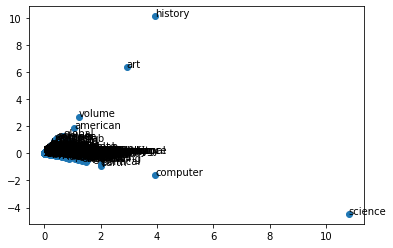

In [28]:
plt.scatter(Z[:,0],Z[:,1])
for i in range(D):
    plt.annotate(s = index_to_words[i],xy = (Z[i,0],Z[i,1]))
plt.show()